# 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Setting visualization style
sns.set(style='whitegrid')

# 2. Load the Dataset

In [3]:
file_path = "C:/Users/Ansh/Desktop/Main Flow/IPL_2023_Dataset.xlsx"
df = pd.read_excel(file_path)

# 3. Data Cleaning

In [4]:
# Display the first few rows to understand the structure
print(df.head())

   Sr no.           Player Base Price          TYPE  COST in INR (CR.)  \
0       0      Shivam Mavi    4000000        BOWLER                6.0   
1       1    Joshua Little    5000000        BOWLER                4.4   
2       2  Kane Williamson   20000000       BATSMAN                2.0   
3       3      K.S. Bharat    2000000  WICKETKEEPER                1.2   
4       4     Mohit Sharma    5000000        BOWLER                0.5   

   Cost in $ 2022 Squad            Team  Base Price in INR  Base Price in $  
0      720.0        KKR  Gujarat Titans                NaN              NaN  
1      528.0        NaN  Gujarat Titans                NaN              NaN  
2      240.0        SRH  Gujarat Titans                NaN              NaN  
3      144.0         DC  Gujarat Titans                NaN              NaN  
4       60.0        NaN  Gujarat Titans                NaN              NaN  


In [5]:
# Check for null values in each column
print("Missing values in each column before cleaning:\n", df.isnull().sum())

Missing values in each column before cleaning:
 Sr no.                 0
Player                 0
Base Price           325
TYPE                   0
COST in INR (CR.)    325
Cost in $            325
2022 Squad           338
Team                   0
Base Price in INR    243
Base Price in $      243
dtype: int64


In [6]:
# Convert relevant columns to numeric, coercing non-numeric values to NaN
df['COST in INR (CR.)'] = pd.to_numeric(df['COST in INR (CR.)'], errors='coerce')
df['Cost in $'] = pd.to_numeric(df['Cost in $'], errors='coerce')
df['Base Price'] = pd.to_numeric(df['Base Price'], errors='coerce')
df['Base Price in INR'] = pd.to_numeric(df['Base Price in INR'], errors='coerce')
df['Base Price in $'] = pd.to_numeric(df['Base Price in $'], errors='coerce')

In [7]:
df['COST in INR (CR.)'] = df['COST in INR (CR.)'].copy().fillna(df['COST in INR (CR.)'].mean())
df['Cost in $'] = df['Cost in $'].copy().fillna(df['Cost in $'].mean())
df['Base Price'] = df['Base Price'].copy().fillna(df['Base Price'].median())
df['Base Price in INR'] = df['Base Price in INR'].copy().fillna(df['Base Price in INR'].median())
df['Base Price in $'] = df['Base Price in $'].copy().fillna(df['Base Price in $'].median())

In [8]:
# Fill missing values for categorical columns with 'Not Available' or 'Unknown'
df['2022 Squad'] = df['2022 Squad'].fillna('Not Available')

In [9]:
# Verify that there are no more missing values
print("Missing values after cleaning:\n", df.isnull().sum())

Missing values after cleaning:
 Sr no.               0
Player               0
Base Price           0
TYPE                 0
COST in INR (CR.)    0
Cost in $            0
2022 Squad           0
Team                 0
Base Price in INR    0
Base Price in $      0
dtype: int64


In [10]:
# Display the cleaned data
print(df.head())

   Sr no.           Player  Base Price          TYPE  COST in INR (CR.)  \
0       0      Shivam Mavi   4000000.0        BOWLER                6.0   
1       1    Joshua Little   5000000.0        BOWLER                4.4   
2       2  Kane Williamson  20000000.0       BATSMAN                2.0   
3       3      K.S. Bharat   2000000.0  WICKETKEEPER                1.2   
4       4     Mohit Sharma   5000000.0        BOWLER                0.5   

   Cost in $     2022 Squad            Team  Base Price in INR  \
0      720.0            KKR  Gujarat Titans          2000000.0   
1      528.0  Not Available  Gujarat Titans          2000000.0   
2      240.0            SRH  Gujarat Titans          2000000.0   
3      144.0             DC  Gujarat Titans          2000000.0   
4       60.0  Not Available  Gujarat Titans          2000000.0   

   Base Price in $  
0          24000.0  
1          24000.0  
2          24000.0  
3          24000.0  
4          24000.0  


In [11]:
# Convert necessary columns to the appropriate data types (if required)
df['COST in INR (CR.)'] = df['COST in INR (CR.)'].astype(float)
df['Cost in $'] = df['Cost in $'].astype(float)

# 4. Exploratory Data Analysis (EDA)

In [12]:
# Display basic statistics for numerical columns
print(df.describe())

           Sr no.    Base Price  COST in INR (CR.)    Cost in $  \
count  568.000000  5.680000e+02         568.000000   568.000000   
mean   283.500000  2.507042e+06           0.687243    82.469136   
std    164.111751  2.515725e+06           1.640907   196.908839   
min      0.000000  1.500000e+06           0.000000     0.000000   
25%    141.750000  2.000000e+06           0.000000     0.000000   
50%    283.500000  2.000000e+06           0.687243    82.469136   
75%    425.250000  2.000000e+06           0.687243    82.469136   
max    567.000000  2.000000e+07          18.500000  2220.000000   

       Base Price in INR  Base Price in $  
count       5.680000e+02       568.000000  
mean        2.831866e+06     33982.394366  
std         2.764474e+06     33173.687113  
min         1.500000e+06     18000.000000  
25%         2.000000e+06     24000.000000  
50%         2.000000e+06     24000.000000  
75%         2.000000e+06     24000.000000  
max         2.000000e+07    240000.000000  


In [13]:
# Check unique values in categorical columns
print(f"{df['Player'].nunique()} unique players in the dataset.")
print("Teams in the dataset:", df['Team'].unique())

565 unique players in the dataset.
Teams in the dataset: ['Gujarat Titans' 'Chennai Super Kings' 'Delhi Capitals'
 'Kolkata Knight Riders' 'Punjab Kings' 'Lucknow Super Giants'
 'Mumbai Indians' 'Royal Challengers Bangalore' 'Rajasthan Royals'
 'Sunrisers Hyderabad' 'Unsold']


# 5. Question Formulation & Answering

In [14]:
# Question 1: Which player has the highest cost in INR?
highest_cost_inr = df[df['COST in INR (CR.)'] == df['COST in INR (CR.)'].max()]
print("Player with the highest cost in INR:\n", highest_cost_inr[['Player', 'COST in INR (CR.)']])

Player with the highest cost in INR:
         Player  COST in INR (CR.)
97  Sam Curran               18.5


In [15]:
# Question 2: How many players were unsold?
unsold_players = df[df['COST in INR (CR.)'] == 0].shape[0]
print("Number of unsold players:", unsold_players)

Number of unsold players: 163


In [16]:
# Question 3: Distribution of players based on type (Batsman, Bowler, All-rounder, Wicketkeeper)?
type_distribution = df['TYPE'].value_counts()
print("Player type distribution:\n", type_distribution)

Player type distribution:
 TYPE
ALL-ROUNDER     213
BOWLER          189
BATSMAN          91
WICKETKEEPER     75
Name: count, dtype: int64


In [17]:
# Question 4: What is the average cost for each player type?
average_cost_type = df.groupby('TYPE')['COST in INR (CR.)'].mean()
print("Average cost for each player type:\n", average_cost_type)

Average cost for each player type:
 TYPE
ALL-ROUNDER     0.738698
BATSMAN         0.778705
BOWLER          0.548271
WICKETKEEPER    0.780346
Name: COST in INR (CR.), dtype: float64


In [18]:
# Question 5: Which team spent the most in the auction?
team_spending = df.groupby('Team')['COST in INR (CR.)'].sum().sort_values(ascending=False)
print("Team spending in the auction:\n", team_spending)

Team spending in the auction:
 Team
Unsold                         223.353909
Sunrisers Hyderabad             35.700000
Mumbai Indians                  20.500000
Punjab Kings                    20.000000
Lucknow Super Giants            19.800000
Chennai Super Kings             18.950000
Delhi Capitals                  15.000000
Gujarat Titans                  14.800000
Rajasthan Royals                 9.850000
Royal Challengers Bangalore      7.000000
Kolkata Knight Riders            5.400000
Name: COST in INR (CR.), dtype: float64


In [19]:
# Question 6: Correlation between Base Price and Final Cost?
correlation = df[['Base Price in INR', 'COST in INR (CR.)']].corr()
print("Correlation between Base Price and Final Cost:\n", correlation)

Correlation between Base Price and Final Cost:
                    Base Price in INR  COST in INR (CR.)
Base Price in INR                1.0                0.0
COST in INR (CR.)                0.0                1.0


# 6. Data Visualization

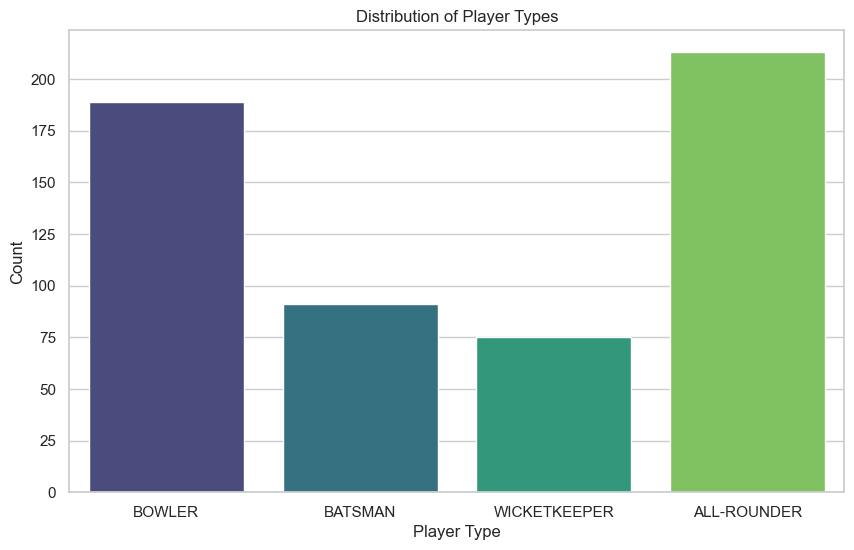

In [20]:
# Visualization 1: Distribution of Player Types
plt.figure(figsize=(10, 6))
sns.countplot(x='TYPE', data=df, palette='viridis')
plt.title('Distribution of Player Types')
plt.xlabel('Player Type')
plt.ylabel('Count')
plt.show()

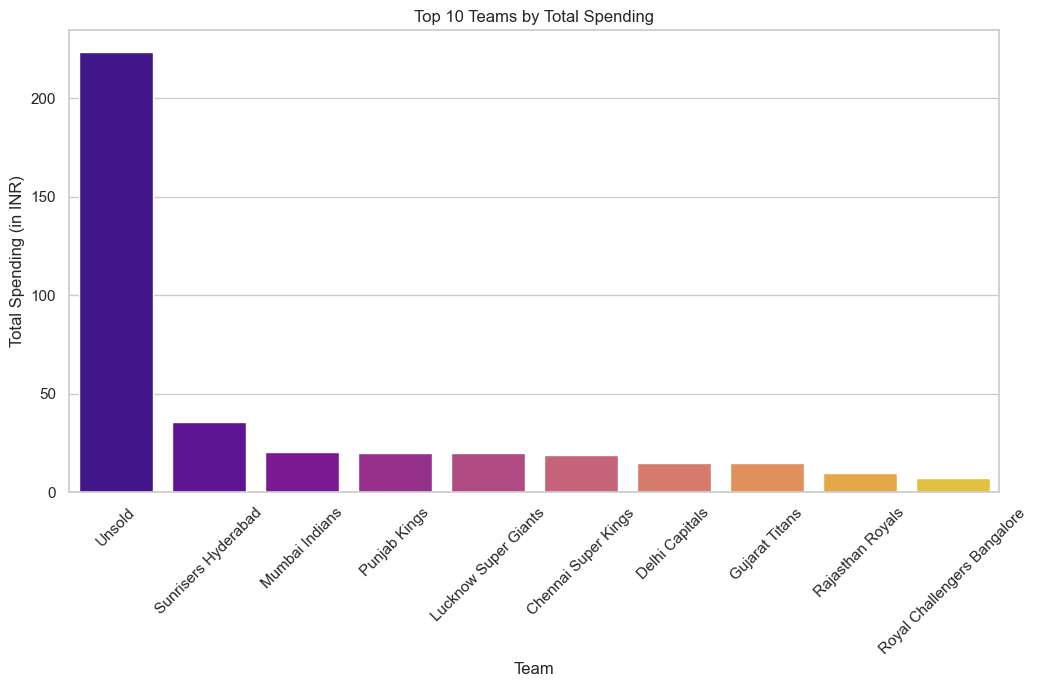

In [21]:
# Visualization 2: Top 10 Teams by Total Spending
plt.figure(figsize=(12, 6))
sns.barplot(x=team_spending.index[:10], y=team_spending.values[:10], palette='plasma')
plt.title('Top 10 Teams by Total Spending')
plt.xlabel('Team')
plt.ylabel('Total Spending (in INR)')
plt.xticks(rotation=45)
plt.show()

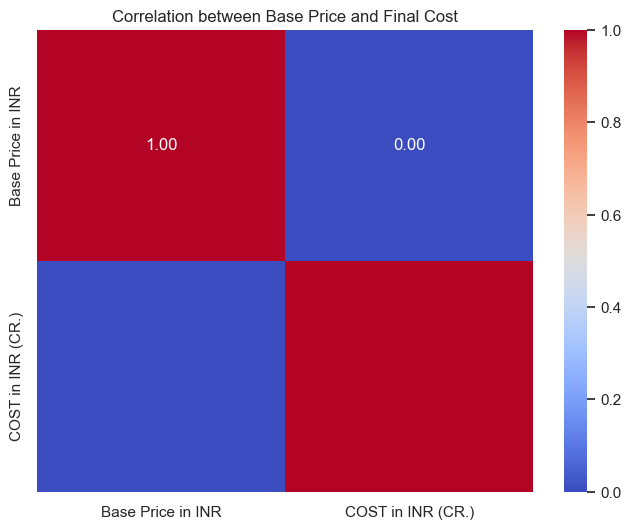

In [22]:
# Visualization 3: Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Base Price and Final Cost')
plt.show()

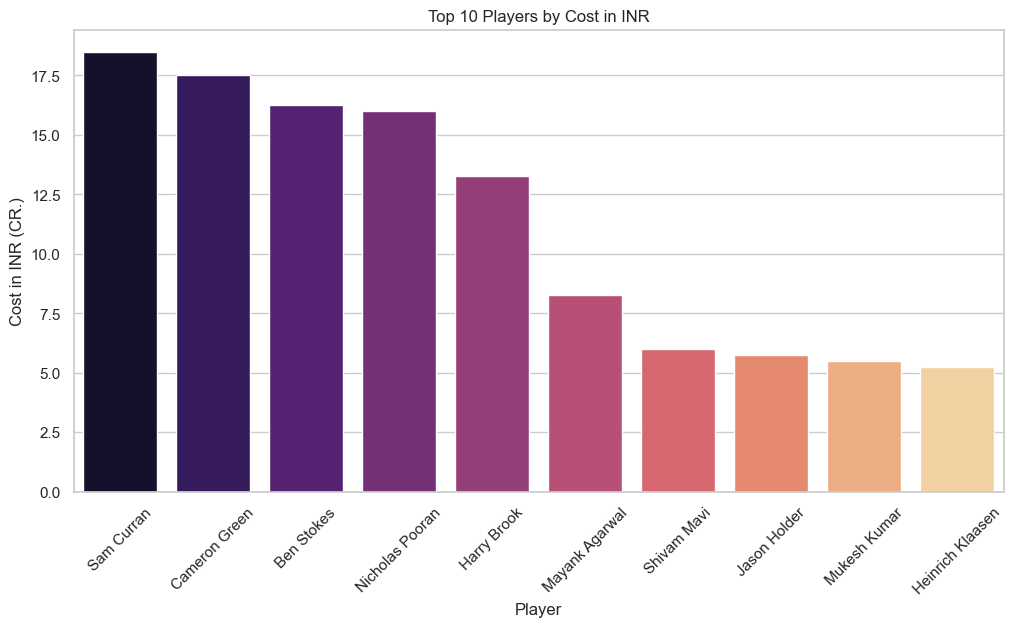

In [23]:
# Visualization 4: Top 10 Players by Cost
top_10_players = df[['Player', 'COST in INR (CR.)']].sort_values(by='COST in INR (CR.)', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_players['Player'], y=top_10_players['COST in INR (CR.)'], palette='magma')
plt.title('Top 10 Players by Cost in INR')
plt.xlabel('Player')
plt.ylabel('Cost in INR (CR.)')
plt.xticks(rotation=45)
plt.show()

C:\Users\Ansh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


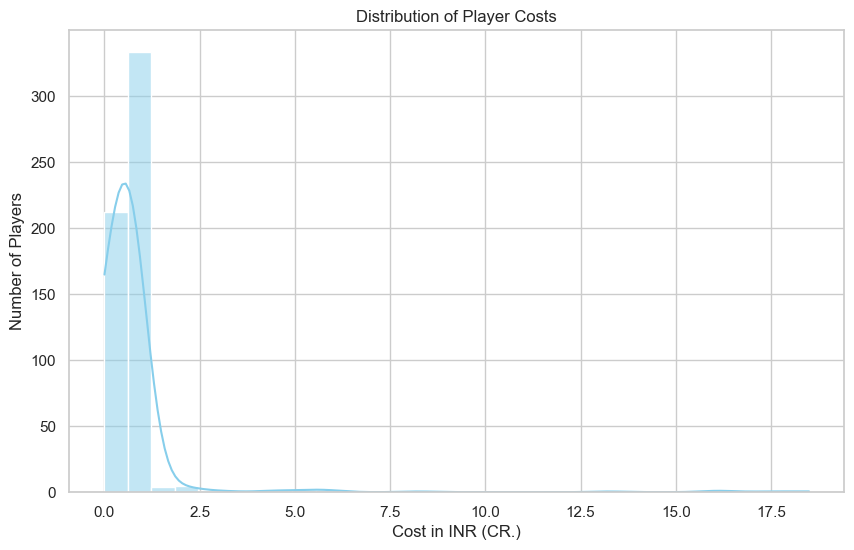

In [24]:
# Visualization 5: Distribution of Costs
plt.figure(figsize=(10, 6))
sns.histplot(df['COST in INR (CR.)'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Player Costs')
plt.xlabel('Cost in INR (CR.)')
plt.ylabel('Number of Players')
plt.show()

# 7. Summary & Insights

In [25]:
summary = """
1. The player with the highest cost in INR is {0}.
2. A total of {1} players remained unsold.
3. The most common player type in the dataset is {2}.
4. The team with the highest total spending is {3}.
5. There is a {4:.2f} correlation between base price and final cost.
""".format(highest_cost_inr['Player'].values[0], unsold_players, 
           type_distribution.idxmax(), team_spending.idxmax(),
           correlation.loc['Base Price in INR', 'COST in INR (CR.)'])

print(summary)


1. The player with the highest cost in INR is Sam Curran.
2. A total of 163 players remained unsold.
3. The most common player type in the dataset is ALL-ROUNDER.
4. The team with the highest total spending is Unsold.
5. There is a 0.00 correlation between base price and final cost.

